In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
df_sales=pd.read_excel("ANF_sales_data.xlsx")

NameError: name 'pd' is not defined

In [6]:
df_sales

,date,quarterly revenue,Unnamed: 2,quarterly gross profit,Unnamed: 4,quarterly net income
0,2024-10-31,1209,NaN,787,NaN,132
1,2024-07-31,1134,NaN,736,NaN,133
2,2024-04-30,1021,NaN,677,NaN,114
3,2024-01-31,1453,NaN,914,NaN,158
4,2023-10-31,1056,NaN,686,NaN,96
5,2023-07-31,935,NaN,584,NaN,57
6,2023-04-30,836,NaN,510,NaN,17
7,2023-01-31,1200,NaN,668,NaN,38
8,2022-10-31,880,NaN,521,NaN,-2
9,2022-07-31,805,NaN,466,NaN,-17


In [7]:
df_sales.drop(columns=["Unnamed: 2","Unnamed: 4"],inplace=True)

In [8]:
df_google_trends=pd.read_csv("google_trends_ANF_worldwide.csv",skiprows=2)

In [9]:
df_google_trends

,Week,Abercrombie & Fitch: (Worldwide)
0,2020-02-02,24
1,2020-02-09,24
2,2020-02-16,25
3,2020-02-23,23
4,2020-03-01,23
...,...,...
257,2025-01-05,39
258,2025-01-12,40
259,2025-01-19,37
260,2025-01-26,36


In [10]:
df_google_trends["Week"]=df_google_trends["Week"].apply(lambda x: pd.to_datetime(x))

In [11]:
df_google_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Week                              262 non-null    datetime64[ns]
 1   Abercrombie & Fitch: (Worldwide)  262 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [12]:
pd.merge(df_google_trends,df_sales,left_on="Week",right_on="date")

,Week,Abercrombie & Fitch: (Worldwide),date,quarterly revenue,quarterly gross profit,quarterly net income
0,2021-01-31,24,2021-01-31,1122,679,82
1,2021-10-31,32,2021-10-31,905,576,47
2,2022-07-31,31,2022-07-31,805,466,-17
3,2023-04-30,27,2023-04-30,836,510,17


In [13]:
df_google_trends.index=df_google_trends["Week"]
df_google_trends.drop(columns=["Week"], inplace=True)




In [14]:

df_google_trends["Abercrombie & Fitch: (Worldwide)"]=df_google_trends["Abercrombie & Fitch: (Worldwide)"].astype(float)

In [15]:
df_trend_resample=df_google_trends["Abercrombie & Fitch: (Worldwide)"].resample("1d").interpolate("linear")

In [32]:
df_google_trends.resample("QE").sum()

,Abercrombie & Fitch: (Worldwide)
Week,
2020-03-31,203.0
2020-06-30,360.0
2020-09-30,360.0
2020-12-31,442.0
2021-03-31,335.0
2021-06-30,355.0
2021-09-30,346.0
2021-12-31,477.0
2022-03-31,364.0


In [16]:
df_sales.index=df_sales["date"]
df_sales.drop(columns=["date"], inplace=True)

In [17]:
df_sales_resample=df_sales.resample("1d").interpolate("linear")

In [18]:
df_merged=pd.merge(df_trend_resample,df_sales_resample,left_on=df_trend_resample.index , right_on=df_sales_resample.index)

In [19]:
df_merged.corr()

,key_0,Abercrombie & Fitch: (Worldwide),quarterly revenue,quarterly gross profit,quarterly net income
key_0,1.000000,0.465796,0.675172,0.707144,0.621514
Abercrombie & Fitch: (Worldwide),0.465796,1.000000,0.354970,0.386941,0.325089
quarterly revenue,0.675172,0.354970,1.000000,0.972263,0.798558
quarterly gross profit,0.707144,0.386941,0.972263,1.000000,0.883953
quarterly net income,0.621514,0.325089,0.798558,0.883953,1.000000


In [20]:
from scipy.stats import pearsonr 

r,p=pearsonr(df_merged["Abercrombie & Fitch: (Worldwide)"] , df_merged["quarterly revenue"])

print(f"{r}     {p}")

0.35496962529632714     1.1970562735624912e-52


<Axes: xlabel='Abercrombie & Fitch: (Worldwide)', ylabel='quarterly revenue'>

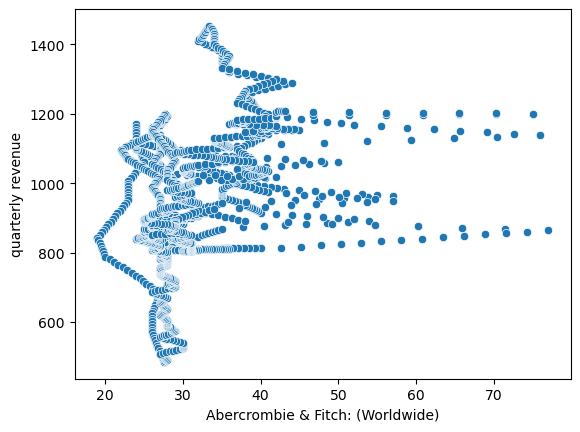

In [21]:
import seaborn as sb

sb.scatterplot(df_merged, x="Abercrombie & Fitch: (Worldwide)" , y = "quarterly revenue")

<Axes: xlabel='Abercrombie & Fitch: (Worldwide)', ylabel='quarterly revenue'>

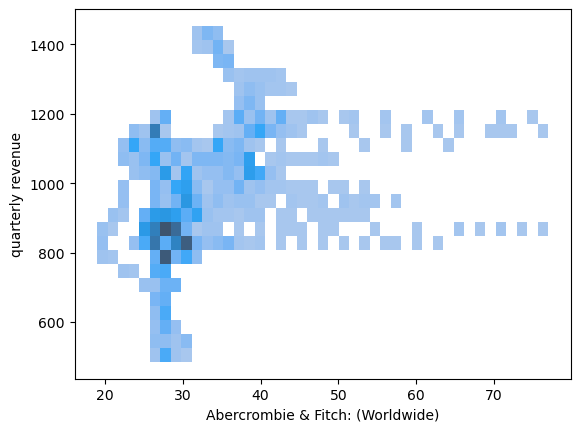

In [22]:
sb.histplot(df_merged, x="Abercrombie & Fitch: (Worldwide)" , y = "quarterly revenue")

In [23]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(df_merged["Abercrombie & Fitch: (Worldwide)"].to_frame(), df_merged["quarterly revenue"])

LinearRegression()

In [24]:
revenue_pred=model.predict(df_merged["Abercrombie & Fitch: (Worldwide)"].to_frame())

In [25]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error

r2=r2_score(df_merged["quarterly revenue"] , revenue_pred)
mpe = mean_absolute_percentage_error(df_merged["quarterly revenue"] , revenue_pred)
print(f"R-squared = {r2}   MPE = {mpe}")

R-squared = 0.1260034348830148   MPE = 0.14924664961123393


In [26]:
import numpy as np

In [27]:
revenue_pred_mean=np.ones(df_merged.shape[0])*df_merged["quarterly revenue"].mean()

r2=r2_score(df_merged["quarterly revenue"] ,revenue_pred_mean)
mpe = mean_absolute_percentage_error(df_merged["quarterly revenue"] ,revenue_pred_mean)
print(f"R-squared = {r2}   MPE = {mpe}")

R-squared = 0.0   MPE = 0.16553217730001046


In [28]:
df_merged

,key_0,Abercrombie & Fitch: (Worldwide),quarterly revenue,quarterly gross profit,quarterly net income
0,2020-02-02,24.000000,1169.444444,679.555556,75.733333
1,2020-02-03,24.000000,1161.666667,674.833333,72.100000
2,2020-02-04,24.000000,1153.888889,670.111111,68.466667
3,2020-02-05,24.000000,1146.111111,665.388889,64.833333
4,2020-02-06,24.000000,1138.333333,660.666667,61.200000
...,...,...,...,...,...
1729,2024-10-27,42.000000,1205.739130,784.782609,132.043478
1730,2024-10-28,42.285714,1206.554348,785.336957,132.032609
1731,2024-10-29,42.571429,1207.369565,785.891304,132.021739
1732,2024-10-30,42.857143,1208.184783,786.445652,132.010870


<Axes: xlabel='key_0', ylabel='Abercrombie & Fitch: (Worldwide)'>

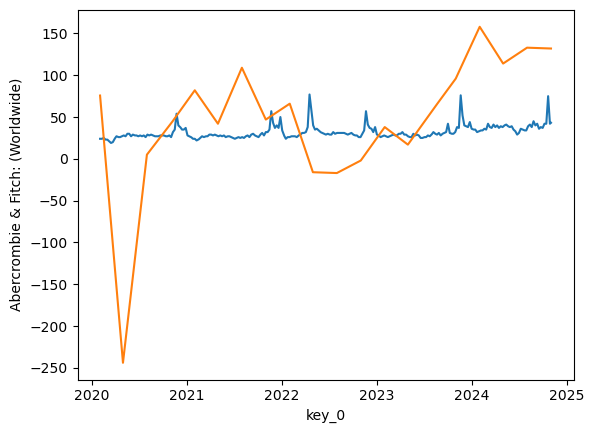

In [34]:
sb.lineplot(data=df_merged , x = "key_0",  y = "Abercrombie & Fitch: (Worldwide)" )
sb.lineplot(data=df_merged , x = "key_0",  y = "quarterly net income" )

In [45]:
df_sales["date"].sort_values().to_list()

[Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2020-07-31 00:00:00'),
 Timestamp('2020-10-31 00:00:00'),
 Timestamp('2021-01-31 00:00:00'),
 Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-07-31 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2022-01-31 00:00:00'),
 Timestamp('2022-04-30 00:00:00'),
 Timestamp('2022-07-31 00:00:00'),
 Timestamp('2022-10-31 00:00:00'),
 Timestamp('2023-01-31 00:00:00'),
 Timestamp('2023-04-30 00:00:00'),
 Timestamp('2023-07-31 00:00:00'),
 Timestamp('2023-10-31 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-10-31 00:00:00')]

In [54]:
#Define custom quarter start dates
custom_quarters = df_sales["date"].sort_values().to_list()
#custom_quarters = [d.date() for d in custom_quarters]

# Assign each row to a quarter
df_merged['quarter'] = pd.cut(df_merged['key_0'], bins=custom_quarters, right=False, labels=custom_quarters[:-1])

# Aggregate by quarter
quarterly_df = df_merged.groupby('quarter').agg({'Abercrombie & Fitch: (Worldwide)': 'sum', 'quarterly revenue': 'sum',  'quarterly gross profit': 'sum', 'quarterly net income': 'sum'})

C:\Users\Admin\AppData\Local\Temp\ipykernel_24464\3286677841.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarterly_df = df_merged.groupby('quarter').agg({'Abercrombie & Fitch: (Worldwide)': 'sum', 'quarterly revenue': 'sum',  'quarterly gross profit': 'sum', 'quarterly net income': 'sum'})


In [57]:
quarterly_df = quarterly_df.reset_index()

In [71]:
quarterly_df["trend_%_change"] = quarterly_df["Abercrombie & Fitch: (Worldwide)"].pct_change()
quarterly_df["netincome_%_change"] = quarterly_df["quarterly net income"].pct_change()
quarterly_df["revenue_%_change"] = quarterly_df["quarterly revenue"].pct_change()
quarterly_df["grossprofit_%_change"] = quarterly_df["quarterly gross profit"].pct_change()	

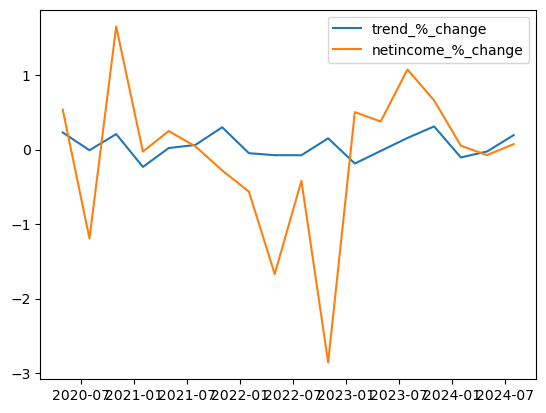

In [ ]:
plt.plot(quarterly_df["quarter"], quarterly_df["trend_%_change"])
plt.plot(quarterly_df["quarter"],  quarterly_df["netincome_%_change"])
plt.plot(quarterly_df["quarter"] , quarterly_df[])
plt.legend(["trend_%_change" , "netincome_%_change"])

plt.show()